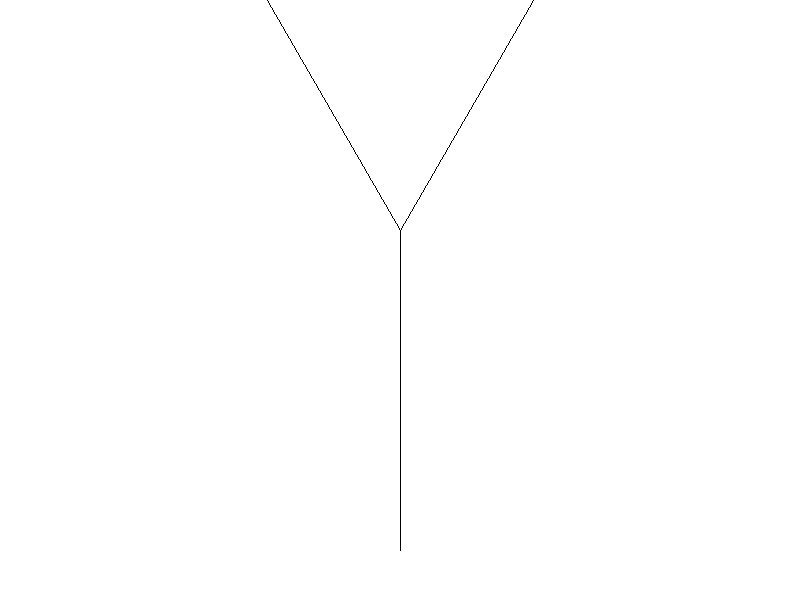

In [ ]:
# Static fractal tree image for GitHub preview
# Auto-generated
from IPython.display import Image as IPyImage
IPyImage(filename='fractal_tree.png')

In [ ]:

# =========================================
# Fractal Tree Generator (GitHub + Colab)
# =========================================

# 1. Install ipywidgets (only if in Colab)
try:
    from google.colab import output
    !pip install ipywidgets
    output.enable_custom_widget_manager()
except ImportError:
    pass  # Not in Colab, skip

# 2. Imports
import colorsys
from math import radians, cos, sin
from PIL import Image as IM, ImageDraw
from IPython.display import display
from ipywidgets import widgets, interact

# 3. Recursive tree drawing
def generate_tree(x_start, y_start, angle_deg, depth, depth_max, branch_angle, branch_length):
    if depth <= 0:
        return

    x_end = x_start + cos(radians(angle_deg)) * branch_length * depth
    y_end = y_start + sin(radians(angle_deg)) * branch_length * depth

    hue_val = float(depth) / depth_max
    r, g, b = colorsys.hsv_to_rgb(hue_val, 1.0, 1.0)
    R, G, B = int(r * 255), int(g * 255), int(b * 255)

    canvas.line([x_start, y_start, x_end, y_end], (R, G, B), width=max(1, depth))

    # Recursively draw left and right branches
    generate_tree(x_end, y_end, angle_deg - branch_angle, depth - 1, depth_max, branch_angle, branch_length)
    generate_tree(x_end, y_end, angle_deg + branch_angle, depth - 1, depth_max, branch_angle, branch_length)

# 4. Refresh function
def refresh_tree(depth_val, spread_val):
    branch_len = 7
    canvas.rectangle((0, 0, img_width, img_height), fill=(0, 0, 0))
    generate_tree(img_width / 2, img_height * 0.9, -90, depth_val, depth_val, spread_val, branch_len)
    img.save("fractal_tree.png", "PNG")  # Save for GitHub preview
    display(IM.open("fractal_tree.png"))

# 5. Setup canvas
img_width, img_height = 600, 480
img = IM.new("RGB", (img_width, img_height))
canvas = ImageDraw.Draw(img)

# 6. Draw default tree (so GitHub shows it in static output)
refresh_tree(8, 30)  # depth=8, spread=30 degrees

# 7. Interactive sliders (for Colab/Jupyter)
depth_slider = widgets.IntSlider(min=1, max=10, step=1, value=8, description="Depth")
spread_slider = widgets.IntSlider(min=0, max=45, step=1, value=30, description="Spread")
interact(refresh_tree, depth_val=depth_slider, spread_val=spread_slider)
